# Moving Average(MA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime, timedelta
register_matplotlib_converters

<function pandas.plotting._misc.register()>

# Generate some Data

# $y_t = 50 + 0.4\varepsilon_{t-1} + 0.3\varepsilon_{t-2} + \varepsilon_t$ 
# $\varepsilon_t \sim N(0,1)$

In [3]:
errors = np.random.normal(0,1,400)

In [7]:
date_index = pd.date_range(start = "9/1/2019", end = "1/1/2020")
date_index

DatetimeIndex(['2019-09-01', '2019-09-02', '2019-09-03', '2019-09-04',
               '2019-09-05', '2019-09-06', '2019-09-07', '2019-09-08',
               '2019-09-09', '2019-09-10',
               ...
               '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
               '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30',
               '2019-12-31', '2020-01-01'],
              dtype='datetime64[ns]', length=123, freq='D')

In [5]:
mu = 50
series = []

for t in range(1, len(date_index)+1):
    series.append(mu + 0.4*errors[t-1] + 0.3*errors[t-2] + errors[t])

In [10]:
series = pd.Series(series, date_index)
series = series.asfreq(pd.infer_freq(series.index))

In [11]:
series

2019-09-01    49.620606
2019-09-02    50.259634
2019-09-03    49.449014
2019-09-04    50.487071
2019-09-05    49.710583
                ...    
2019-12-28    49.329566
2019-12-29    49.453356
2019-12-30    49.145132
2019-12-31    48.949226
2020-01-01    49.189103
Freq: D, Length: 123, dtype: float64

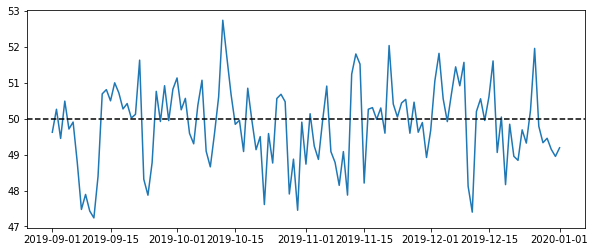

In [12]:
plt.figure(figsize = (10,4))
plt.plot(series)
plt.axhline(mu, linestyle = "--", color = "k")

In [13]:
def calc_corr(series, lag):
    return pearsonr(series[:-lag], series[lag:])[0]

# ACF

<BarContainer object of 10 artists>

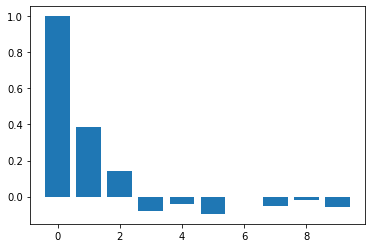

In [15]:
acf_val = acf(series)
num_lags = 10
plt.bar(range(num_lags), acf_val[:num_lags])

# PACF

<BarContainer object of 25 artists>

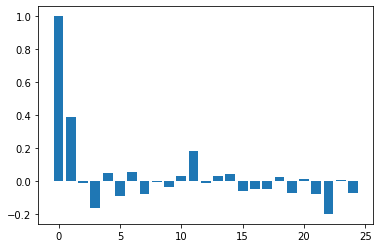

In [17]:
pacf_val = pacf(series)
num_lags =  25
plt.bar(range(num_lags), pacf_val[:num_lags])

# Get Training and Testing sets

In [18]:
train_end = datetime(2019, 12, 30)
test_end = datetime(2020, 1 ,1)

train_data = series[:train_end]
test_data = series[train_end + timedelta(days = 1): test_end]

# Fit ARIMA Model

In [20]:
#Create the model
model = ARIMA(train_data, order = (0,0,2))

In [21]:
#Fit the model
model_fit = model.fit()

In [22]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  121
Model:                     ARMA(0, 2)   Log Likelihood                -175.715
Method:                       css-mle   S.D. of innovations              1.033
Date:                Fri, 19 Nov 2021   AIC                            359.431
Time:                        02:20:27   BIC                            370.614
Sample:                    09-01-2019   HQIC                           363.973
                         - 12-30-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.8415      0.151    329.781      0.000      49.545      50.138
ma.L1.y        0.4018      0.091      4.439      0.000       0.224       0.579
ma.L2.y        0.2145      0.086      2.486      0.0

# Predicted Model

In [23]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [25]:
#get the prediction and residuals
predictions = model_fit.predict(start = pred_start_date, end = pred_end_date)

In [26]:
residuals = test_data - predictions

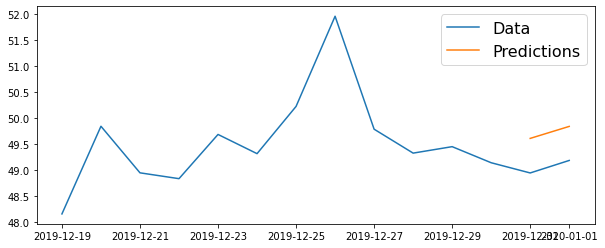

In [27]:
plt.figure(figsize = (10,4))

plt.plot(series[-14:])
plt.plot(predictions)

plt.legend(("Data", "Predictions"),fontsize = 16)

In [29]:
print("MAPE :", round(np.mean(abs(residuals/test_data)), 4))

MAPE : 0.0134


In [30]:
print("RMSE :", np.sqrt(np.mean(residuals**2)))

RMSE : 0.6574940940343419
